# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the tuning of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/driver_ratings.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/driver_ratings_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.31152345129617853
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.030469978157337
              precision    recall  f1-score   support

           1       0.54      0.90      0.68       252
           2       0.60      0.73      0.66       252
           3       0.38      0.50      0.43       252
           4       0.30      0.48      0.37       252
           5       0.28      0.41      0.33       252
           6       0.24      0.36      0.29       252
           7       0.21      0.25      0.23       252
           8       0.28      0.30      0.29       252
           9       0.23      0.27      0.25       252
          10       0.21      0.25      0.23       252
          11       0.30      0.27      0.28       252
          12       0.19      0.26      0.22       252
          13       0.25      0.23      0.24       252
          14 

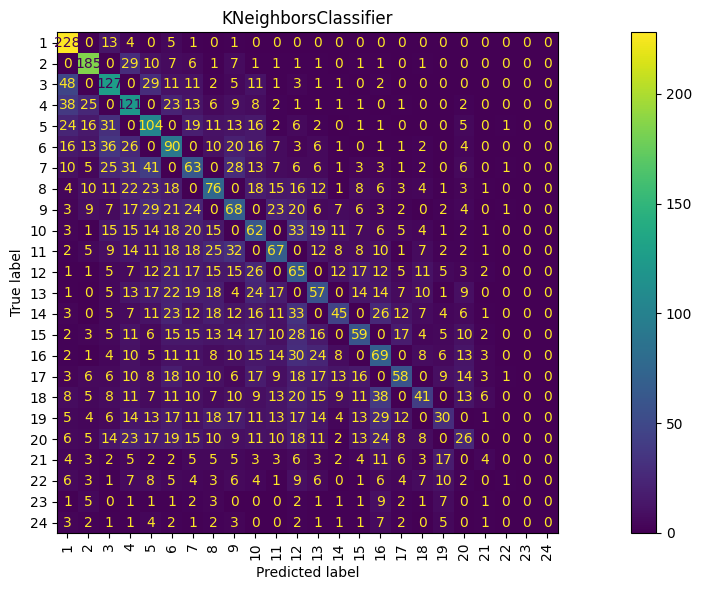

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=99):
CV with make_scorer(balanced_accuracy_1interval_score): 0.29167593769866496
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -4.083226648143778
              precision    recall  f1-score   support

           1       0.54      0.85      0.66       252
           2       0.56      0.63      0.59       252
           3       0.38      0.40      0.39       252
           4       0.33      0.32      0.32       252
           5       0.28      0.30      0.29       252
           6       0.22      0.38      0.28       252
           7       0.27      0.39      0.32       252
           8       0.20      0.22      0.21       252
           9       0.26      0.24      0.25       252
          10       0.19      0.23      0.21       252
          11       0.24      0.29      0.26       252
          12       0.18      0.25      0.21       252
          13       0.25      0.26      0.25       252
          14 

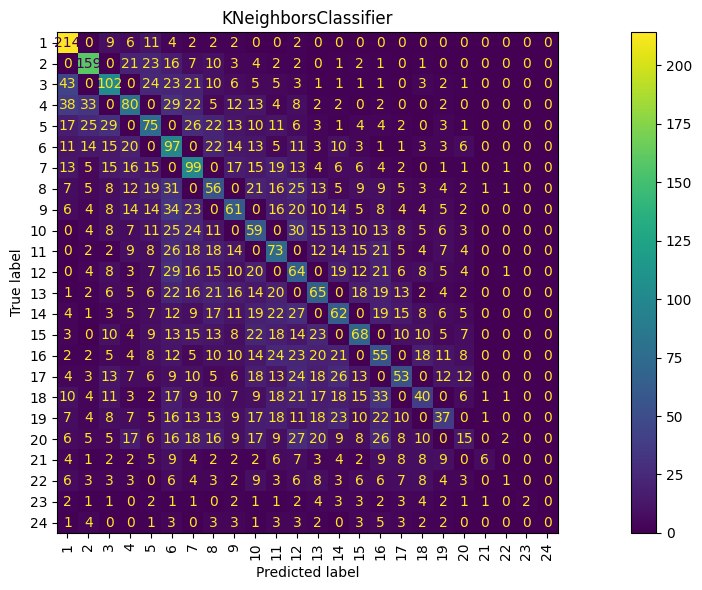

In [4]:
knn = KNeighborsClassifier(n_neighbors=99, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.34870385086294176
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.5930724261573252
              precision    recall  f1-score   support

           1       0.69      0.85      0.76       252
           2       0.65      0.74      0.69       252
           3       0.49      0.60      0.54       252
           4       0.40      0.55      0.47       252
           5       0.38      0.41      0.39       252
           6       0.45      0.40      0.42       252
           7       0.22      0.35      0.27       252
           8       0.40      0.37      0.38       252
           9       0.17      0.29      0.22       252
          10       0.39      0.32      0.35       252
          11       0.18      0.27      0.22       252
          12       0.23      0.35      0.28       252
          13       0.26      0.15      0.19       252
          14       0.75      0.31

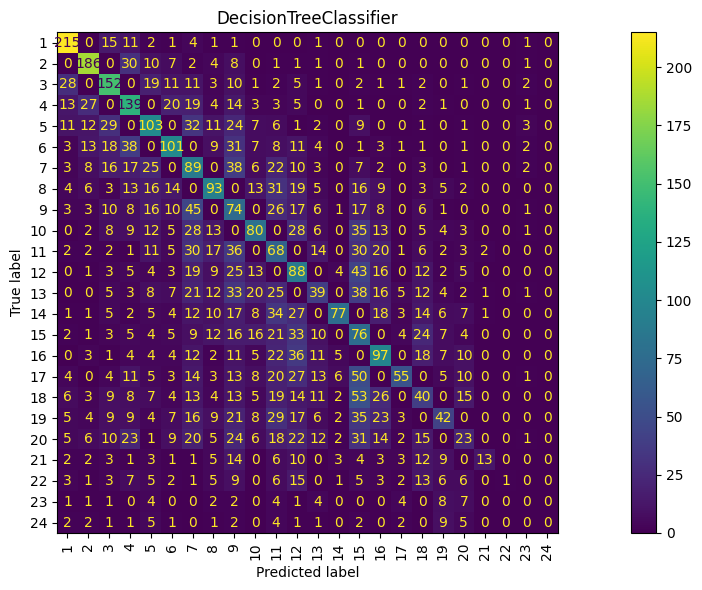

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3370117256480893
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.682160459578656
              precision    recall  f1-score   support

           1       0.71      0.82      0.76       252
           2       0.57      0.70      0.63       252
           3       0.51      0.63      0.56       252
           4       0.36      0.53      0.43       252
           5       0.40      0.40      0.40       252
           6       0.38      0.38      0.38       252
           7       0.24      0.37      0.29       252
           8       0.37      0.28      0.32       252
           9       0.20      0.25      0.22       252
          10       0.35      0.28      0.31       252
          11       0.21      0.37      0.27       252
          12       0.19      0.42      0.26       252
          13       0.33      0.26      0.29       252
          14       0.37      0.26  

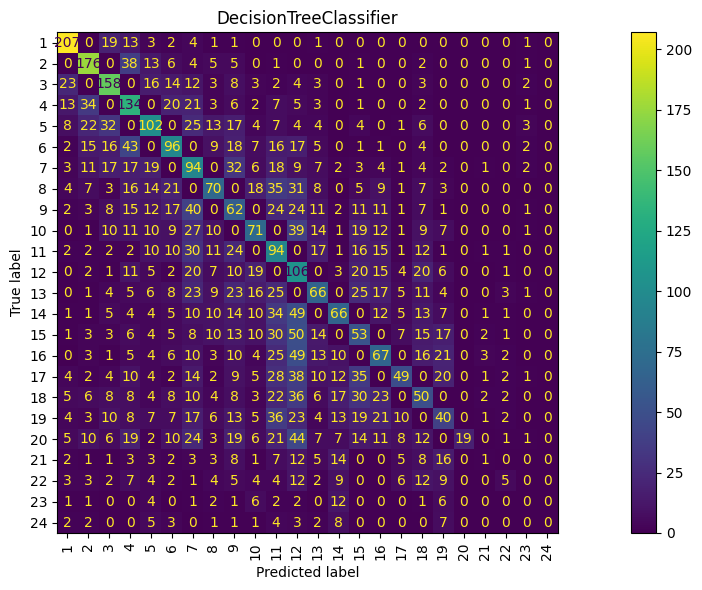

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.35769323479550746
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.68346953979854
              precision    recall  f1-score   support

           1       0.59      0.91      0.72       252
           2       0.60      0.78      0.68       252
           3       0.44      0.63      0.52       252
           4       0.42      0.56      0.48       252
           5       0.39      0.41      0.40       252
           6       0.27      0.42      0.33       252
           7       0.30      0.42      0.35       252
           8       0.34      0.37      0.35       252
           9       0.26      0.22      0.24       252
          10       0.24      0.21      0.22       252
          11       0.27      0.24      0.26       252
          12       0.24      0.31      0.27       252
          13       0.34      0.26      0.30       252
          14     

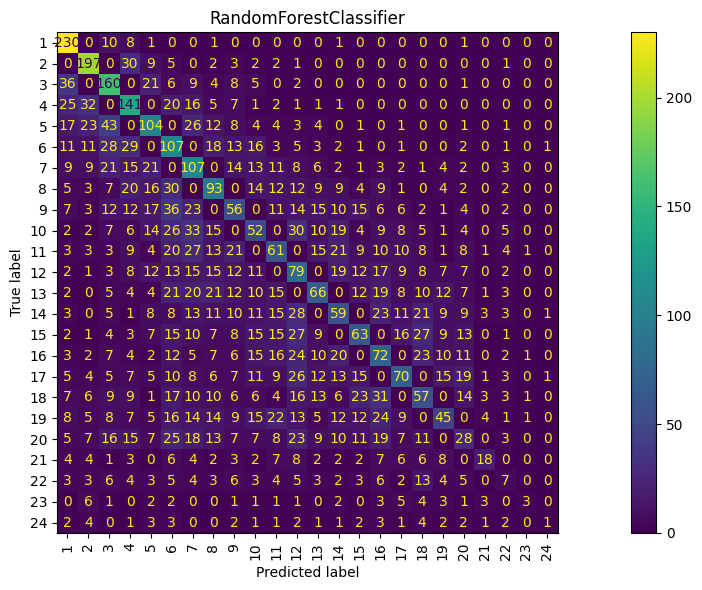

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorNationality",
        "grandPrix",
        "circuitRef",
        "driverWins",
        "constructorWins",
        "q1",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(max_depth=6, n_estimators=143):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3516069200160109
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.6640232175883933
              precision    recall  f1-score   support

           1       0.54      0.90      0.68       252
           2       0.61      0.80      0.69       252
           3       0.48      0.63      0.54       252
           4       0.36      0.49      0.42       252
           5       0.37      0.40      0.38       252
           6       0.27      0.43      0.33       252
           7       0.27      0.39      0.32       252
           8       0.38      0.33      0.35       252
           9       0.24      0.23      0.23       252
          10       0.22      0.21      0.21       252
          11       0.26      0.26      0.26       252
          12       0.29      0.35      0.31       252
          13       0.26      0.23      0.24       252
          14    

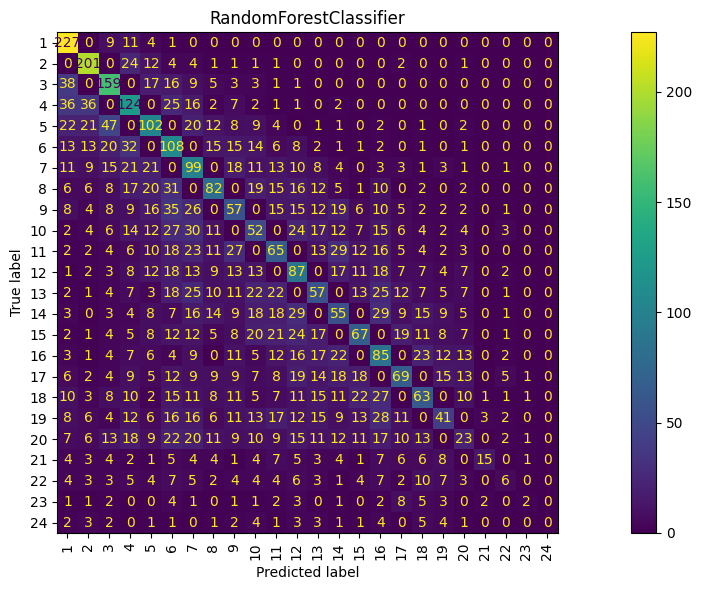

In [8]:
random_forest = RandomForestClassifier(max_depth=6, n_estimators=143, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.36333589390407567
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.437953391770916
              precision    recall  f1-score   support

           1       0.60      0.96      0.74       252
           2       0.60      0.78      0.68       252
           3       0.63      0.59      0.61       252
           4       0.42      0.54      0.47       252
           5       0.38      0.53      0.44       252
           6       0.29      0.48      0.36       252
           7       0.43      0.38      0.41       252
           8       0.30      0.33      0.32       252
           9       0.23      0.29      0.26       252
          10       0.38      0.33      0.35       252
          11       0.18      0.31      0.23       252
          12       0.25      0.31      0.28       252
          13       0.32      0.20      0.25       252


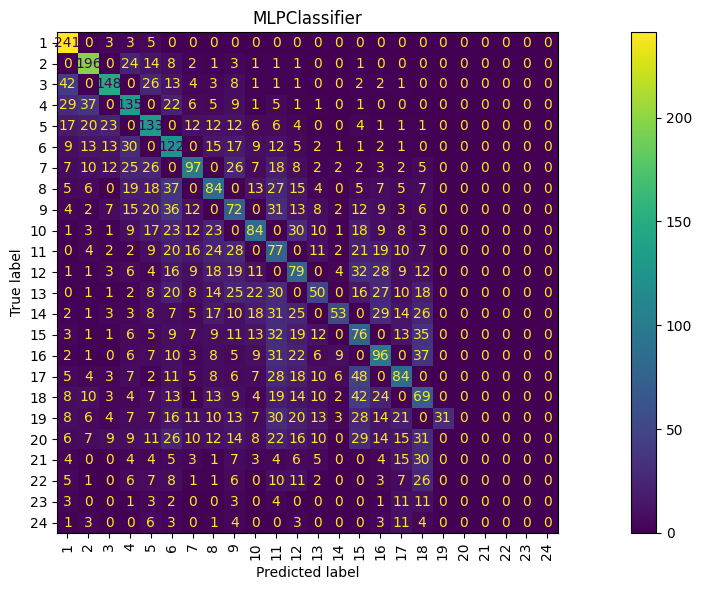

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "circuitRef",
        "circuitCountry",
        "circuitLat",
        "driverWins",
        "driverAgeToday",
        "driverAgeAtRace",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 26, 31)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3653137287796379
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -3.409122517746143
              precision    recall  f1-score   support

           1       0.63      0.92      0.75       252
           2       0.62      0.75      0.68       252
           3       0.56      0.57      0.56       252
           4       0.41      0.50      0.45       252
           5       0.37      0.51      0.43       252
           6       0.28      0.48      0.35       252
           7       0.35      0.43      0.38       252
           8       0.28      0.28      0.28       252
           9       0.28      0.25      0.26       252
          10       0.30      0.27      0.28       252
          11       0.20      0.31      0.24       252
          12       0.29      0.38      0.33       252
          13       0.26      0.27      0.26       252
 

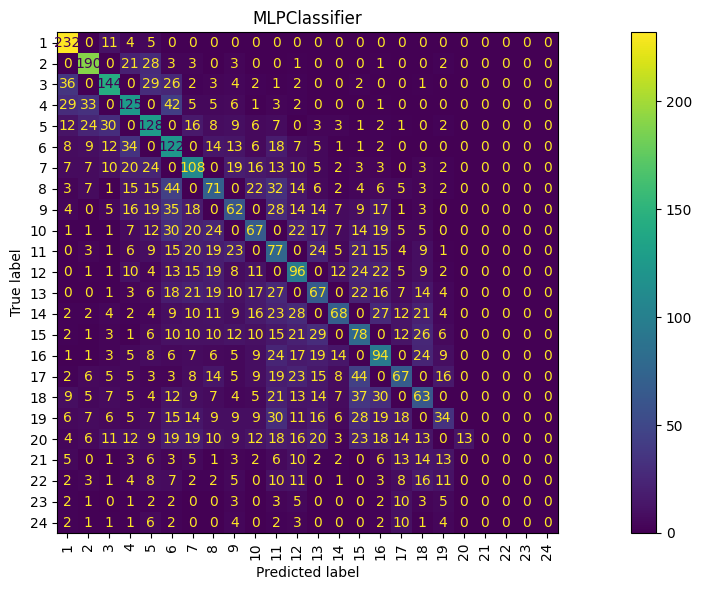

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 26, 31))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has not improved.

With all attributes, we have smoothly improved the performance of the model.
